In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import yfinance as yf

from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

from Data_Retriever import DataRetriever as DatRet
from Markowitz_PT import MarkowitzPT as MPT

<h1> Stock pool </h1>

In [3]:
# Petroleum
# EQNR 36.6, AKRBP 35.3, Subsea7 17.9, Vår energi 27.9

# Food (Seafood)
# Orkla 18, Mowi 21.2, Salmar 18.7, LSG 29.2

# Materials
# NHY 15.7, Yara 25.6, NSKOG 23.1, ELK 29.9

# Technologies
# TEL 19.8, NOD 13.8, ATEA 18.1, BOUV 19

# Financials
# STB 17.2, DNB 14, GJF 17.2, MING.OL 19.5

# Shipping
# WAWI 19.7, SNI 21.2, BELCO 26.8, ODF 19.3

In [4]:
# Defining stock pool
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["AKRBP.OL", "EQNR.OL", "ODL.OL"]
ticker_df["Materials"] = ["NHY.OL", "NSKOG.OL", "RANA.OL"]
ticker_df["Food"] = ["LSG.OL", "MOWI.OL", "ORK.OL"]
ticker_df

,Petroleum,Materials,Food
0,AKRBP.OL,NHY.OL,LSG.OL
1,EQNR.OL,NSKOG.OL,MOWI.OL
2,ODL.OL,RANA.OL,ORK.OL


In [5]:
# Retrieve data from yf API
data = DatRet(ticker_df, "2022-02-19", "2025-02-18")
data.retrieve_data()

# Generate benchmark weights thorugh MPT using Sharpe ratio
benchmark = MPT(data.returns, 252,10)
benchmark.frequency_optimizing()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


--Frequency trading using MPT successfully performed--


In [6]:
# flat_series_list = [series for row in data.returns for series in row]
# df = pd.concat(flat_series_list,axis=1)

In [9]:
# sum(daily_ben_weights[0][0*3:(0+1)*3] * daily_returns[0][0*3:(0+1)*3])/ 0.5

In [10]:
#sector i
i = 0
#stock j
j = 0
# time trading days
time = 11

data.returns[i][j].iloc[-time].iloc[0]-1

np.float64(0.0025412885359612503)

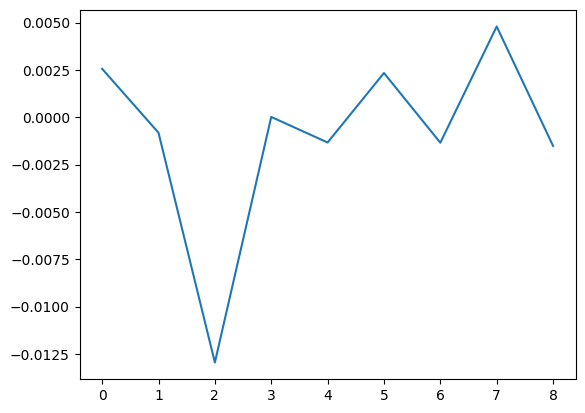

In [11]:
daily_returns = []
for time in range(1,10,1):
    ind_day_ret = np.array([data.returns[i][j].iloc[-time].iloc[0] for i in  range(3) for j in range(3)]) -1
    daily_returns.append(ind_day_ret[::])
daily_returns = np.array(daily_returns[::-1])

daily_ben_weights = benchmark.frequency_weights[:-1]
daily_ben_weights = np.array([np.array(benchmark.frequency_weights[i][0]) for i in range(len(benchmark.frequency_weights))])[:-1]
daily_exp_weights = np.repeat(1/9,9)


# rl_perf = [daily_ben_weights[time]@daily_returns[time] for time in range(9)]
rl_perf = [sum(daily_ben_weights[time]*daily_returns[time]) for time in range(9)]

# mpt_perf = [daily_exp_weights@daily_returns[time] for time in range(9)]
mpt_perf = [sum(daily_exp_weights*daily_returns[time]) for time in range(9)]

# excess_ret = [(rl_perf[time]-mpt_perf[time])/rl_perf[time] for time in range(9)]
excess_ret = [rl_perf[time] - mpt_perf[time] for time in range(9)]

plt.plot(excess_ret)

In [21]:
daily_returns

array([[-0.01714287,  0.04298855, -0.00321548,  0.00423599, -0.01501246,
        -0.00679351, -0.00279593,  0.00781605,  0.00097464],
       [ 0.00823047,  0.01370126,  0.0130293 , -0.03616219,  0.02566298,
         0.00409279, -0.00648145,  0.0050832 , -0.01060751],
       [-0.00816328, -0.00548827, -0.00162594,  0.01180294,  0.14048776,
        -0.01478501,  0.00371749,  0.00278036,  0.        ],
       [-0.02661896, -0.03045875, -0.00646206,  0.00863098, -0.00966187,
         0.0013459 , -0.00278038, -0.00690293, -0.00575269],
       [-0.02290373, -0.03197153, -0.02056963,  0.02314246,  0.01371208,
         0.00814125, -0.00369346, -0.00730923, -0.00191385],
       [ 0.03412279,  0.04317213, -0.00784931, -0.00030436,  0.        ,
         0.00820786,  0.00557109,  0.01202032,  0.01161662],
       [ 0.0150775 ,  0.04884214,  0.00791141, -0.01558287, -0.09805651,
        -0.02010722, -0.01553935, -0.01457857, -0.04880291],
       [-0.00122103, -0.00291036,  0.        ,  0.01397749, -0

In [12]:
# bitch = []
# for i in range(0, 9, 1):
#     bitch.append(daily_exp_weights)

In [13]:
# daily_exp_weights = bitch

In [14]:
# def bhb_attribution(daily_returns, daily_ben_weights, daily_exp_weights):
#     """
#     Calculates the Brinson, Hood, and Beebower (BHB) attribution effects: allocation, selection, and interaction.
    
#     Parameters:
#     - daily_returns: list of np.arrays, each of shape (9,), daily returns for 9 stocks.
#     - daily_ben_weights: list of np.arrays, each of shape (9,), benchmark weights for 9 stocks.
#     - daily_exp_weights: list of np.arrays, each of shape (9,), portfolio weights for 9 stocks.
    
#     Returns:
#     - allocation_effect: np.array of shape (time, 3), allocation effect per sector.
#     - selection_effect: np.array of shape (time, 3), selection effect per sector.
#     - interaction_effect: np.array of shape (time, 3), interaction effect per sector.
#     - total_excess_return: np.array of shape (time,), total excess return per day.
#     """
#     num_sectors = 3
#     stocks_per_sector = 3
    
#     # Convert lists to NumPy arrays
#     daily_returns = np.array(daily_returns)
#     daily_ben_weights = np.array(daily_ben_weights)
#     daily_exp_weights = np.array(daily_exp_weights)
    
#     # Initialize effect arrays
#     allocation_effect = np.zeros((daily_returns.shape[0], num_sectors))
#     selection_effect = np.zeros((daily_returns.shape[0], num_sectors))
#     interaction_effect = np.zeros((daily_returns.shape[0], num_sectors))
    
#     # Compute attribution effects per sector
#     for i in range(num_sectors):
#         wb = np.sum(daily_ben_weights[:, i*stocks_per_sector:(i+1)*stocks_per_sector], axis=1)
#         we = np.sum(daily_exp_weights[:, i*stocks_per_sector:(i+1)*stocks_per_sector], axis=1)
#         rb = np.sum(daily_ben_weights[:, i*stocks_per_sector:(i+1)*stocks_per_sector] * daily_returns[:, i*stocks_per_sector:(i+1)*stocks_per_sector], axis=1)
#         re = np.sum(daily_exp_weights[:, i*stocks_per_sector:(i+1)*stocks_per_sector] * daily_returns[:, i*stocks_per_sector:(i+1)*stocks_per_sector], axis=1)
        
#         allocation_effect[:, i] = rb * (we - wb)
#         selection_effect[:, i] = wb * (re - rb)
#         interaction_effect[:, i] = (we - wb) * (re - rb)
    
#     total_excess_return = np.sum(allocation_effect + selection_effect + interaction_effect, axis=1)
    
#     return allocation_effect, selection_effect, interaction_effect, total_excess_return


In [15]:
# rix = bhb_attribution(daily_returns, daily_ben_weights, daily_exp_weights)

In [16]:
# result_list = [daily_exp_weights for _ in range(9)]
# daily_exp_weights = np.array(result_list)

In [17]:
def calculate_bhb(daily_ben_weights, daily_returns, daily_exp_weights):
    """
    Calculate Brinson, Hood, and Beebower (BHB) attribution model.

    Args:
        daily_ben_weights (list): List of 9 benchmark weights.
        daily_returns (list): List of 9 daily returns.
        daily_exp_weights (list): List of 9 experimental portfolio weights.

    Returns:
        tuple: Allocation effect, selection effect, interaction effect, and total excess return.
    """
    time_list = []
    for time in range(0, 9,1):
        allocation_effect = 0
        selection_effect = 0
        interaction_effect = 0
        
        # Divide portfolio into 3 sectors (0:3, 3:6, 6:9)
        for i in range(3):
            wb = sum(daily_ben_weights[time][i*3:(i+1)*3])
            we = sum(daily_exp_weights[time][i*3:(i+1)*3])
            rb = sum(np.array(daily_ben_weights[time][i*3:(i+1)*3]) * np.array(daily_returns[time][i*3:(i+1)*3]))/wb
            re = sum(np.array(daily_exp_weights[time][i*3:(i+1)*3]) * np.array(daily_returns[time][i*3:(i+1)*3]))/we
            
            allocation_effect += rb * (we - wb)  # Allocation Effect
            selection_effect += wb * (re - rb)  # Selection Effect
            interaction_effect += (we - wb) * (re - rb)  # Interaction Effect
        
        total_excess_return = allocation_effect + selection_effect + interaction_effect
        time_list.append([allocation_effect, selection_effect, interaction_effect, total_excess_return])
    return time_list


In [18]:
fox = calculate_bhb(daily_ben_weights,daily_returns, daily_exp_weights)

IndexError: invalid index to scalar variable.

In [ ]:
fox

[[np.float64(-0.0007696374512249267),
  np.float64(-0.002011543919875492),
  np.float64(0.0002763050372582265),
  np.float64(-0.002504876333842192)],
 [np.float64(0.0019300841601726745),
  np.float64(-0.001125927142835592),
  np.float64(1.873080633690632e-05),
  np.float64(0.0008228878236739888)],
 [np.float64(0.00027268247211935896),
  np.float64(0.007781419265215953),
  np.float64(0.004885653855912291),
  np.float64(0.012939755593247603)],
 [np.float64(-0.000904762628681623),
  np.float64(0.001005289879081211),
  np.float64(-0.000146385515319155),
  np.float64(-4.585826491956702e-05)],
 [np.float64(-0.00019591003703849498),
  np.float64(0.0010216819711555574),
  np.float64(0.00048414461014765564),
  np.float64(0.001309916544264718)],
 [np.float64(0.00110256936921531),
  np.float64(-0.0028806867448029653),
  np.float64(-0.0005172369046498397),
  np.float64(-0.002295354280237495)],
 [np.float64(0.006999194832186832),
  np.float64(-0.0016227837445927235),
  np.float64(-0.003940642353093

In [ ]:
fox[3]

array([ 0.00014616,  0.00069653, -0.00210966, -0.00094797,  0.00350226,
        0.0007298 , -0.00265801,  0.00109063,  0.00798134])

In [ ]:
daily_ben_weights

NameError: name 'daily_ben_weights' is not defined

In [ ]:
excess_ret

[np.float64(0.0025048763338421922),
 np.float64(-0.0008228878236739884),
 np.float64(-0.012939755593247605),
 np.float64(4.585826491956824e-05),
 np.float64(-0.0013099165442647187),
 np.float64(0.002295354280237494),
 np.float64(-0.0014357687345002423),
 np.float64(0.004779572935114766),
 np.float64(-0.0015484305617652259)]

In [ ]:
fox[0][0]+fox[1][0]+fox[2][0]

np.float64(0.00014616215723790523)

In [ ]:
wb1 = np.sum(daily_ben_weights[0][:3])
we1 = np.sum(daily_exp_weights[:3])
rb1 = np.dot(daily_ben_weights[0][:3], daily_returns[0][:3])
re1 = np.dot(daily_exp_weights[:3], daily_returns[0][:3])

wb2 = np.sum(daily_ben_weights[0][3:6])
we2 = np.sum(daily_exp_weights[3:6])
rb2 = np.dot(daily_ben_weights[0][:3], daily_returns[0][3:6])
re2 = np.dot(daily_exp_weights[:3], daily_returns[0][3:6])


wb3 = np.sum(daily_ben_weights[0][6:9])
we3 = np.sum(daily_exp_weights[6:9])
rb3 = np.dot(daily_ben_weights[0][:3], daily_returns[0][6:9])
re3 = np.dot(daily_exp_weights[:3], daily_returns[0][6:9])

# Allocations:
ae1 = rb1*(we1-wb1)
ae2 = rb2*(we2-wb2)
ae3 = rb3*(we3-wb3)
allocation = ae1+ae2+ae3

# Selections:
se1 = wb1*(re1-rb1)
se2 = wb2*(re2-rb2)
se3 = wb3*(re3-rb3)
selection = se1+se2+se3

# Interaction:
ie1 = (we1-wb1)*(re1-rb1)
ie2 = (we2-wb2)*(re2-rb2)
ie3 = (we3-wb3)*(re3-rb3)
interaction = ie1 + ie2+ ie3

print(allocation*100)
print(selection*100)
print(interaction*100)
delta=allocation+selection+interaction
print(delta)

-0.006934288266357137
0.0015404291477781572
-0.009500069902821807
-0.00014893929021400786


In [ ]:
fox

(np.float64(-0.0005328568492038127),
 np.float64(-0.0011743012428612075),
 np.float64(0.00036851326751202317),
 np.float64(-0.001338644824552997))

In [ ]:
print(delta-1)
print(excess_ret[0]+1)

-1.000148939290214
1.0024173639260476


In [ ]:
# class BHBAnalyzer():
    
#     def __init__(self, 
#                  benchmark_data=None,
#                  experiment_data=None,
#                  raw_data=None
#                  ):
#         """
#         Args:
#             benchmark_data: NxM list from MPT
#             experiment_data: NxM list from RL    
#         """
#         self.benchmark_data =  benchmark_data
#         self.experiment_data = experiment_data
#         self.raw_data = raw_data

#     def frequency_analyze():
#         pass

In [ ]:
bix = [([ 0.00823047,  0.01370126,  0.0130293 , -0.03616219,  0.02566298,
        0.00409279, -0.00648145,  0.0050832 , -0.01060751]), ([-0.02661896, -0.03045875, -0.00646206,  0.00863098, -0.00966187,
        0.0013459 , -0.00278038, -0.00690293, -0.00575269]), ([ 0.03412279,  0.04317213, -0.00784931, -0.00030436,  0.        ,
        0.00820786,  0.00557109,  0.01202032,  0.01161662]), ([-0.00122103, -0.00291036,  0.        ,  0.01397749, -0.0479395 ,
       -0.0158312 , -0.01084988, -0.0134832 ,  0.01023254]), ([ 0.00647903,  0.0199882 , -0.01404054, -0.02517768,  0.03391307,
        0.        ,  0.0063694 ,  0.00678736, -0.00462963]), ([ 0.0150775 ,  0.04884214,  0.00791141, -0.01558287, -0.09805651,
       -0.02010722, -0.01553935, -0.01457857, -0.04880291]), ([-0.02290373, -0.03197153, -0.02056963,  0.02314246,  0.01371208,
        0.00814125, -0.00369346, -0.00730923, -0.00191385]), ([-0.00816328, -0.00548827, -0.00162594,  0.01180294,  0.14048776,
       -0.01478501,  0.00371749,  0.00278036,  0.        ])]

In [ ]:
len(bix)

8

In [ ]:
time = 7
sps = 3
#sec = i
i = 2

daily_ben_weights[time][i*sps:(i+1)*sps] * bix[time][i*sps:(i+1)*sps]

array([4.99169276e-05, 7.25906796e-04, 0.00000000e+00])

In [ ]:
daily_ben_weights[0][3:6]

array([0.03231707, 0.02430611, 0.13828008])

In [ ]:
daily_ben_weights[time][i*sps:(i+1)*sps] * bix[time][i*sps:(i+1)*sps]

array([0.0006853 , 0.00126587, 0.00065867])

In [ ]:
daily_ben_weights[0][3:4]

array([0.03231707])

In [ ]:
daily_ben_weights[time][i*sps:(i+1)*sps]

array([0.08326435, 0.0923911 , 0.05055328])